Implementing/Creating the Maze

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def generate_maze(size, p_blocked=0.3):
    maze = np.zeros((size, size), dtype=int)
    stack = []
    visited = set()
    #choose a random cell and add it to stack
    start_cell = (np.random.randint(size), np.random.randint(size))
    stack.append(start_cell)

    while stack:
        #choose latest cell in stack and get coordinates; mark it as visited
        current_cell = stack[-1]
        x, y = current_cell
        visited.add(current_cell)

        #get the neighbors and find which are unvistited; save the unvisted in an array
        neighbors = [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]
        unvisited_neighbors = [neighbor for neighbor in neighbors if 0 <= neighbor[0] < size and 0 <= neighbor[1] < size and neighbor not in visited]
        if unvisited_neighbors:
            #choose a random neighbor from unvistited neighbors array,label it as the next cell
            Neighbor_size = len(unvisited_neighbors)
            cellIndex = np.random.randint(0,Neighbor_size)
            cellIndex = cellIndex-1
            next_cell = unvisited_neighbors[cellIndex]
            nx, ny = next_cell

            #with a probability of the cell being blocked being 0.3, assign the next cell to be blocked or unblocked; add it to the stack
            if np.random.rand() < p_blocked:
                maze[nx, ny] = 1  # Blocked
            else:
                maze[nx, ny] = 0  # Unblocked

            stack.append(next_cell)
        # if there are no unvisited neighbors then dead end; pop the stack to backtrack to second latest and repeat process
        else:
            stack.pop()

    return maze
def visualize_maze(maze):
    print("Blocked" , np.sum(maze==1))
    print("Unblocked", np.sum(maze==0))
    plt.imshow(maze, cmap='gray', interpolation='nearest')
    plt.show()

Blocked 2995
Unblocked 7206


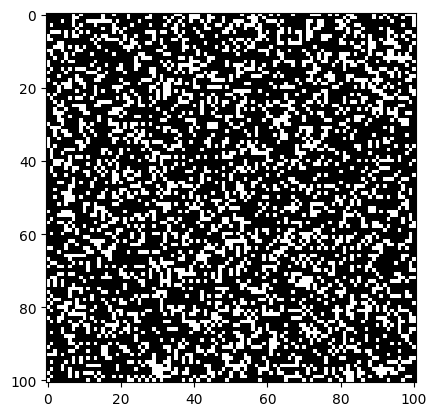

In [13]:
num_environments = 1
size = 101
mazes = []
for i in range(num_environments):
    maze = generate_maze(size)
    mazes.append(maze)
    visualize_maze(maze)

Part 1 - Understanding the Methods

a) The first move of the robot would be to the left. In its intial herustic knowledge it does not know which cells are blocked and that the goal/destination cell is shortest to its left. That is why it would go left one cell first. Then it would try to go left one cell again but it would realize the next cell is blocked. It would make a new path to go around the blocked cell by going up, to the left twice and down but it would see the above cell is blocked as well and it would have to come up with a new path.

b) Due to the fact that it does not know which cells are blocked and that it intially assumes that none of the cells are blocked, the algorithm will find a path at every state with the new knowledge it gains about blocked cells at every state. In the case that the goal state is blocked from being reached, the algorithm will essentially traverse every state provided and try to find a path to the goal state. Once it has traversed every state and has realized that no path exists to the goal it will know that the goal is impossible to reach. This proves that if the goal is reachable no matter how complex the maze is, the algorthim will find it. If the goal is not reachable, the algorithm will realize this after traversing every state. Knwoing this, it can be proved that the number of moves to reach the goal or realize the goal is impossible to reach is upper bounded by the number of unblocked squares squared because in the case that the goal is impossible then the player would essentially traverse each unblocked cell twice. 

Part 2 - The Effects of Ties

Part 3 - Forward vs Backward

In [8]:
class Node:
    def __init__(self, state, g_cost, h_cost):
        self.state = state
        self.g_cost = g_cost
        self.h_cost = h_cost
        self.f_cost = g_cost + h_cost
        self.parent = None

In [6]:
def getManhattan(current,target):
    xDiff = abs(current.state[0]-target.state[0])
    yDiff = abs(current.state[1]-target.state[1])
    sum = xDiff+yDiff
    return sum    

In [19]:
while(True):
    start_cell = (np.random.randint(101), np.random.randint(101))
    x,y = start_cell
    target_cell = (np.random.randint(101), np.random.randint(101))
    z,w = target_cell
    if((mazes[0][x,y] == 0) and (mazes[0][z,w]==0) and (x is not z) and (y is not w)):
        break
initialH = abs(start_cell[0]-target_cell[0])+abs(start_cell[1]-target_cell[1])
Start = Node(start_cell,0,initialH)
Target = Node(target_cell, float('inf'),0)

0
0
(31, 48)
(15, 21)


In [ ]:
import heapq
def getNeighbors(current,open,target):
    x = current.state[0]
    y = current.state[1]
    if (mazes[0][x+1,y]==0):
        Right = Node((x+1,y),current.g_cost+1,getManhattan(current,target))
        heapq.heappush(open,Right.f_cost,Right)
    if (mazes[0][x-1,y]==0):
        Left = Node((x-1,y),current.g_cost+1,getManhattan(current,target))
        heapq.heappush(open,Left.f_cost,Left)
    if (mazes[0][x,y+1]==0):
        Up = Node((x,y+1),current.g_cost+1,getManhattan(current,target))
        heapq.heappush(open,Up.f_cost,Up)
    if (mazes[0][x,y-1]==0):
        Down = Node((x,y-1),current.g_cost+1,getManhattan(current,target))
        heapq.heappush(open,Down.f_cost,Down)


In [ ]:
def computePath(current, open, target):
    getNeighbors(current,open,target)

In [ ]:
import heapq
open = []
heapq.heappush(open,(Start.f_cost,Start))
def forwardPath():
    